<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Klasifikasi kartu kredit (SVM)
<br>
<br><strong>Jarna Ajda
<br><strong>09011181823013
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2020

**Fungsi-fungsi *libraries* yang digunakan**

###### Importing librairies
1. pandas = *toolkit* analisis data,  pada fitur dataframe dapat membaca sebuah file berformat csv dan menjadikannya tabel.
2. numpy = untuk operasi vektor dan matriks. Fiturnya hampir sama dengan MATLAB dalam mengelola array dan array multidimensi. Numpy merupakan salah satu library yang digunakan oleh library lain seperti Scikit-Learn untuk keperluan analisis data.
##### Scikit-learn library: For SVM
3. sklearn preprocessing 
4. Sklearn confusion_matrix : mengukur performa model learning dalam bentuk tabel
5. Sklearn svm
6. itertools
##### Library ini digunakan untuk men-plot 
7. matplotlib pyplot
8. matplotlib mlab
##### Library for the statistic data vizualisation
9. seaborn

In [25]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline



In [26]:
data = pd.read_csv('creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame

# Data Visualization
visualisasi data atau data visualization adalah tampilan berupa grafis atau visual dari informasi dan data.

Dengan kata lain, data visualization mengubah kumpulan data menjadi hal lebih sederhana untuk ditampilkan.  

Dengan menggunakan elemen visual tersebut, pembaca akan lebih mudah memahami tren, outliers, dan pola dalam suatu data. 

In [27]:
df = pd.DataFrame(data) # memindahkan data ke Panda DataFrame

> Deskripsi fitur statistik (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum )

In [28]:
df.describe()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# PCA

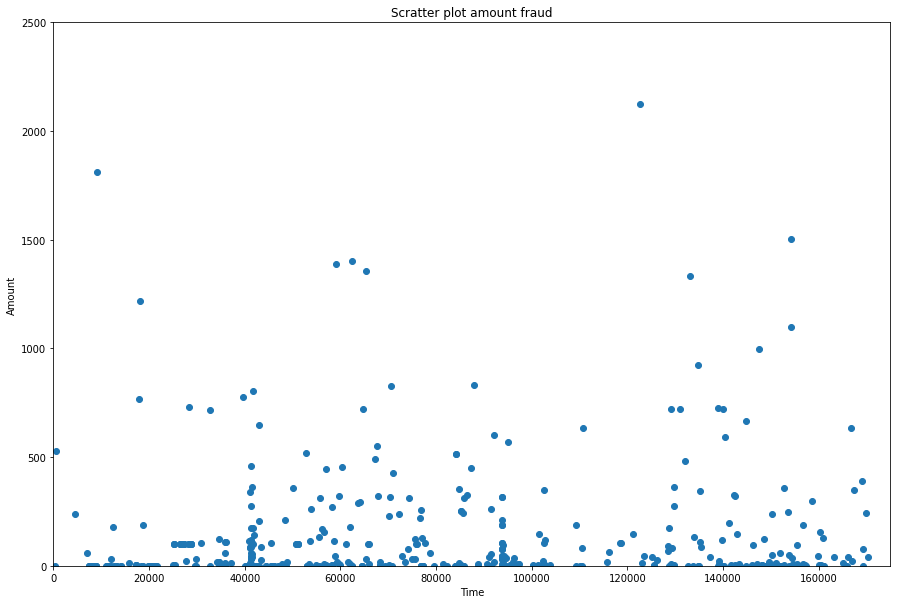

In [29]:
df_fraud = df[df['Class'] == 1] # pemulihan data fraud 
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # menampilkan jumlah fraud sesuai dengan waktu
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

untuk memberitahu, pertama-tama, waktu tidak memengaruhi frekuensi fraud. Apalagi mayoritas fraud dalam jumlah kecil.

In [32]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # pemulihan frauds lebih dari 1000
print('hanya ada '+ str(nb_big_fraud) + ' dimana jumlah frauds lebih besar dari 1000 dari lebih ' + str(df_fraud.shape[0]) + ' frauds')

hanya ada 9 dimana jumlah frauds lebih besar dari 1000 dari lebih 492 frauds


**Unbalanced data** (data tidak seimbang )

In [33]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('hanya ada '+ str(number_fraud) + ' frauds dalam kumpulan data asli, meskipun ada'  +  str(number_no_fraud) +' yang tidak ada fraud dalam dataset.')

hanya ada 492 frauds dalam kumpulan data asli, meskipun ada284315 yang tidak ada fraud dalam dataset.


Dataset ini tidak seimbang yang berarti penggunaan data apa adanya dapat mengakibatkan perilaku yang tidak diinginkan dari sebuah supervised classifier.
Untuk memudahkan pemahaman jika klasifikasi  dilatih dengan kumpulan data ini, mencoba mencapai akurasi terbaik, kemungkinan besar akan melabeli setiap transaksi sebagai non-fraud

In [34]:
print("Akurasi dari pengklasifikasi adalah:  "+ str((284315-492)/284315)+ " yang merupakan jumlah klasifikasi yang baik atas jumlah tupel yang akan diklasifikasikan.")

Akurasi dari pengklasifikasi adalah:  0.998269524998681 yang merupakan jumlah klasifikasi yang baik atas jumlah tupel yang akan diklasifikasikan.


Untuk menjawab masalah tersebut kita dapat menggunakan prinsip oversampling atau prinsip undersampling
Prinsip undersampling harus digunakan jika kita dapat yakin bahwa beberapa tuple yang dipilih (dalam hal ini non-fraud) mewakili seluruh transaksi non-fraud dari dataset.

# Correlation of features

In [35]:
df_corr = df.corr() # Perhitungan koefisien korelasi berpasangan, dengan metode default:
                    # Pearson, Koefisien Korelasi Standar

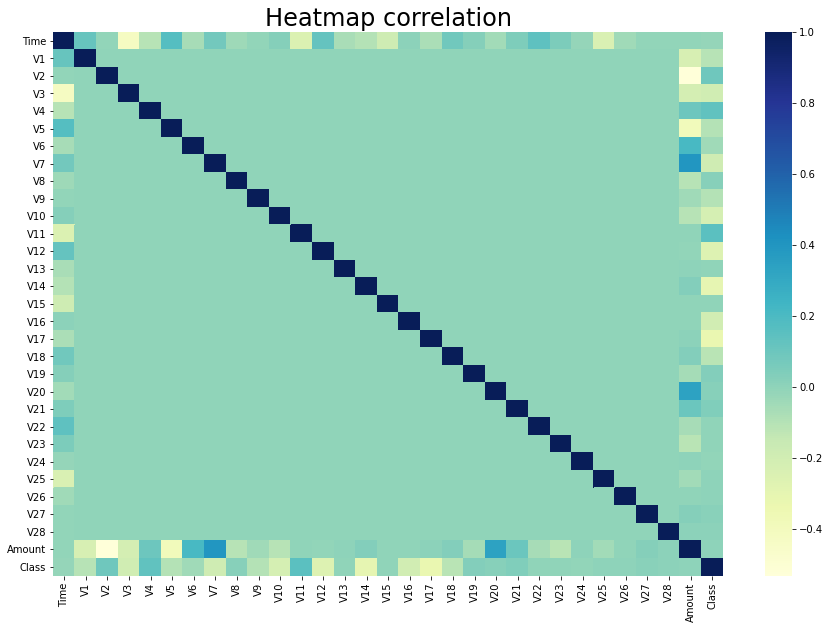

In [36]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # menampilkan Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

Fungsi dari principal component analysis (PCA) adalah dengan merangkum banyak variabel bebas (X) yang memiliki indikasi saling berkorelasi ataupun saling mempengaruhi menjadi satu atau lebih variabel baru yang memuat kombinasi dari variabel-variabel bebas (X) sebelumnya, yang akan memungkinkan menghilangkan masalah multikolinearitas ketika dibentuk suatu model regresi (regresi komponen utama).

Seperti yang dapat kita perhatikan, sebagian besar fitur tidak berkorelasi satu sama lain. Ini menguatkan fakta bahwa PCA sebelumnya dilakukan pada data.

Apa yang umumnya dapat dilakukan pada kumpulan data besar adalah pengurangan dimensi.
Dengan memilih dimensi paling penting, ada kemungkinan untuk menjelaskan sebagian besar masalah, sehingga memperoleh hasil
waktu yang cukup lama sekaligus mencegah akurasi turun terlalu banyak.

Namun dalam kasus ini bahwa PCA telah dilakukan sebelumnya, jika pengurangan dimensi efektif maka PCA tidak dihitung dengan cara yang paling efektif. Cara lain untuk menjelaskannya adalah bahwa tidak ada pengurangan dimensi yang harus dihitung pada set data tempat PCA dihitung dengan benar.

In [37]:
rank = df_corr['Class'] # Mengambil koefisien korelasi per fitur dalam hubungannya dengan kelas fitur
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Merangking nilai absolut dari koefisien
                                                                  # dalam urutan menurun
df_rank.dropna(inplace=True) # Menghapus Data yang Hilang (bukan angka)

**Data Selection**

 merupakan proses meminimalkan jumlah data yang digunakan untuk proses mining dengan tetap merepresentasikan data aslinya. Menciptakan himpunan data target , pemilihan himpunan data, atau memfokuskan pada subset variabel atau sampel data, dimana penemuan (discovery) akan dilakukan.

**OVERSAMPLING**

yang dilakukan pada strategi ini dilakukan pada kelas minoritas yaitu kelas lebih dan kurang, karena jumlah data pada kelas tersebut kurang dari 20 data. 

Salah satu cara untuk melakukan oversampling adalah dengan mereplikasi tupel kelas yang kurang terwakili sampai kita mencapai proporsi yang tepat antara kelas tersebut.

Namun karena tidak memiliki waktu, maka akan menjalankan pengklasifikasi dengan data pelatihan yang tidak diambil sampelnya (bagi mereka yang menggunakan prinsip undersampling jika hasilnya benar-benar buruk, jalankan kembali definisi set data pelatihan)

**UNDERSAMPLING**

dilakukan pada kelas baik dan rentan yang merupakan kelas mayoritas.

In [38]:
# memisahkan data kami dalam dua kelompok: dataset train dan dataset uji

# membangun train dataset
df_train_all = df[0:150000] # Kami memotong dua kumpulan data asli
df_train_1 = df_train_all[df_train_all['Class'] == 1] # Kami memisahkan data mana yang frauds dan yang bukan frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # mengumpulkan frauds dengan no frauds. 
df_train = df_train.sample(frac=1) # kemudian mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [39]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # Kami drop fitur Waktu (tidak berguna), dan Kelas (label)
y_train = df_train['Class'] # membuat label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [40]:
############################## semua test dataset melihat model tersebut apakah dipelajari dengan benar ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

Kemudian mendefinisikan training dan testing setelah menerapkan pengurangan dimensi untuk menggambarkan fakta bahwa tidak ada yang akan diperoleh, karena PCA telah dihitung sebelumnya

In [41]:
X_train_rank = df_train[df_rank.index[1:11]] # mengambil sepuluh fitur peringkat pertama
X_train_rank = np.asarray(X_train_rank)

In [42]:
############################## semua test dataset melihat apakah model tersebut dipeljari dengan benar ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix 

Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Agar lebih mudah memahaminya, saya menggunakan contoh kasus sederhana untuk klasifikasi credit card dua kategori fraud dan non fraud
**True Positive (TP)**
Merupakan data positif yang diprediksi benar. Contohnya, credit card fraud (class 1) dan dari model yang dibuat klasifikasi creditcard tersebut creditcard  fraud  (class 1).
**True Negative (TN)**
Merupakan data negatif yang diprediksi benar. Contohnya, credit card non fraud  (class 0) dan dari model yang dibuat memprediksi pasien tersebut credit card non fraud  (class 0).
**False Postive (FP) — Type I Error**
Merupakan data negatif namun diprediksi sebagai data positif. Contohnya, credit card non fraud  (class 0) tetapi dari model yang telah credit card fraud  (class 1).
**False Negative (FN) — Type II Error**
Merupakan data positif namun diprediksi sebagai data negatif. Contohnya, credit card fraud  (class 1) tetapi dari model yang dibuat credit card fraud non (class 0).

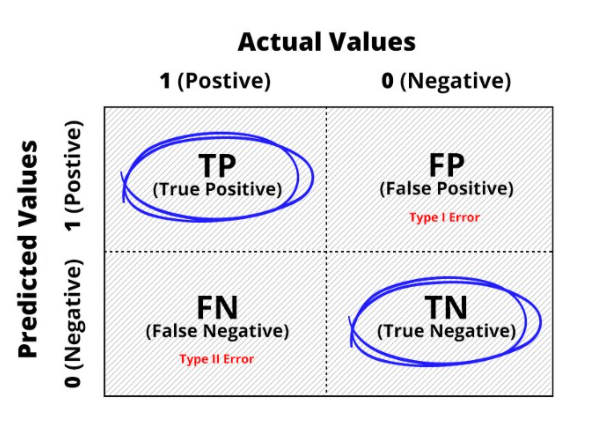


In [43]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [44]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection

Jadi sekarang, kita akan menggunakan pengklasifikasi model SVM (support vektor machine), dengan library scikit-learn.

In [45]:
classifier = svm.SVC(kernel='linear') # menetapkan pengklasifikasi SVM, Pengklasifikasi SVM default (Kernel = Radial Basis Function)

In [46]:
classifier.fit(X_train, y_train) # kemudian men train model, dengan data train yang seimbang

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Testing the model

In [47]:
prediction_SVM_all = classifier.predict(X_test_all) #memprediksi pengujian data test.

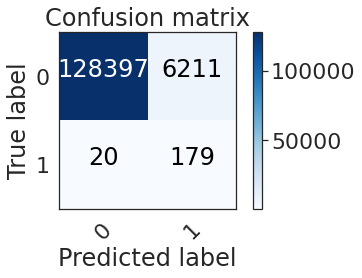

In [48]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

Dalam hal ini akan mencoba meminimalkan jumlah kesalahan dalam hasil prediksi. Kesalahan berada di antidiagonal matriks konfusi. Tetapi dapat menyimpulkan bahwa salah mengenai fraud jauh lebih buruk daripada salah tentang transaksi non-fraud.

Itulah mengapa menggunakan akurasi sebagai kriteria klasifikasi saja yang dapat dianggap tidak efektif.
kriterianya akan mempertimbangkan presisi pada fraud 4 kali lebih penting daripada akurasi umum.
Padahal hasil pengujian terakhir adalah akurasi.

In [49]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9103536628747453


In [50]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 179 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.8994974874371859
the accuracy is : 0.9537783646249823


 # Models Rank

Ada kebutuhan untuk menghitung kembali metode fit, karena dimensi tupel yang akan diprediksi berubah dari 29 menjadi 10 karena reduksi dimensi.

In [51]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

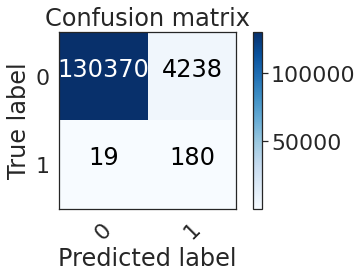

In [52]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [53]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9173023946797866


In [54]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 180 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9045226130653267
the accuracy is : 0.9684215211376264


menggunakan data yang direduksi jauh dari tidak relevan, yang berarti bahwa langkah terakhir dari PCA yang dihitung sebelumnya dapat dilakukan dengan cara yang lebih efisien. Memang salah satunya yang di miliki oleh PCA setelah  menghitung arah komponen utama, adalah berapa banyak komponen ini yang akan simpan. Artinya, sebagian dari 30 dimensi tersebut tidak banyak membedakan kelas.

# Re-balanced class weigh :

Pada model SVM yang digunakan sebelumnya, bobot tiap kelas sama, yang berarti melewatkan fraud sama buruknya dengan salah menilai non-fraud. Tujuannya, bagi bank, adalah memaksimalkan jumlah fraud yang terdeteksi!maka mempertimbangkan lebih banyak tuple non-fraud sebagai operasi fraud. Jadi, kita perlu meminimalkan kesalahan positif: jumlah fraud yang tidak terdeteksi.

Memang, dengan memodifikasi parameter class_weight, kita dapat memilih kelas mana yang lebih dipentingkan selama fase pelatihan. Dalam kasus ini, class_1 yang menjelaskan operasi fraud akan dianggap lebih penting daripada class_0 (operasi non-fraud). Namun, dalam hal ini kami akan lebih mementingkan class_0 karena banyaknya operasi non-fraud yang salah diklasifikasikan. Tentu saja tujuannya adalah untuk menghilangkan fraud seefektif mungkin dalam prosesnya.


In [55]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [56]:
classifier_b.fit(X_train, y_train) # Kemudian melatih model, dengan data train yang seimbang.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing the model

In [57]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #memprediksi semua kumpulan data.

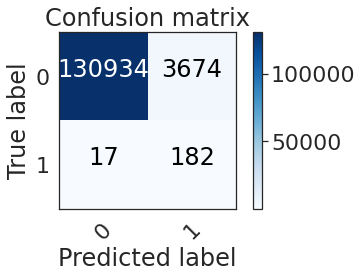

In [58]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [59]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9261823146905013


In [60]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.9726201161660745


 # Models Rank

In [61]:
classifier_b.fit(X_train_rank, y_train) # Kemudian melatih model, dengan data train yang seimbang.
prediction_SVM = classifier_b.predict(X_test_all_rank) #Dan akhirnya, memprediksi pengujian data test.

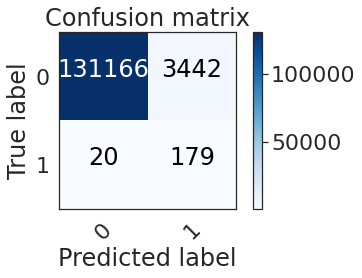

In [62]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [63]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9144617581516968


In [64]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 179 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.8994974874371859
the accuracy is : 0.9743188410097399


#### Referensi : https://www.kaggle.com/jacklizhi/creditcard